In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import hvplot.pandas 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# using Path import the data
# test_df = pd.read_csv(Path('test.csv'))
# sample_df = pd.read_csv(Path('sampleSubmission.csv'))
# train_df = pd.read_csv(Path('train.csv'))

# Telcom Churn Data Import

In [5]:
# import the telcom churn csv data
telcom_data_df = pd.read_excel(Path('resources/telcom_customer_data.xlsx'))
telcom_data_df.shape # (4250, 10)
telcom_data_df.head()

,state,age,area_code,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,number_customer_service_calls,churn
0,OH,42,area_code_415,1,26,161.6,123,27.47,1,no
1,NJ,36,area_code_415,0,0,243.4,114,41.38,0,no
2,OH,39,area_code_408,0,0,299.4,71,50.90,2,no
3,OK,41,area_code_415,0,0,166.7,113,28.34,3,no
4,MA,34,area_code_510,1,24,218.2,88,37.09,3,no


In [6]:
# Modify the area_code column by removing the "area_code_" part of the string from every entry.
telcom_data_df['area_code'] = telcom_data_df['area_code'].str.replace('area_code_', '')
# Modify the churn column by replacing the "yes" with a 1 and "no" with a 0.
telcom_data_df['churn'] = telcom_data_df['churn'].replace({'yes': 1, 'no': 0})
telcom_data_df.head()

C:\Users\lerch\AppData\Local\Temp\ipykernel_13680\386215360.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telcom_data_df['churn'] = telcom_data_df['churn'].replace({'yes': 1, 'no': 0})


,state,age,area_code,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,number_customer_service_calls,churn
0,OH,42,415,1,26,161.6,123,27.47,1,0
1,NJ,36,415,0,0,243.4,114,41.38,0,0
2,OH,39,408,0,0,299.4,71,50.90,2,0
3,OK,41,415,0,0,166.7,113,28.34,3,0
4,MA,34,510,1,24,218.2,88,37.09,3,0


Now that the churn column contains numerical values, we can calculate the churn rate. It’s a business metric that gives us the percentage of people who stopped using the product during a given time period. We can calculate this metric for our data as follows:

 $$Churn Rate = (churned / total customers) ∗ 100$$
Please note that all our rows correspond to customer data from the same time period. The formula above reflects that as well.

The above metric can present us with a good overview of the percentage of user churn. As a business, of course, the goal is to minimize churn.

Instructions
In an empty cell, calculate the churn rate.
In a Text Box, briefly describe whether you think the churn rate is high or not.
Keep in mind that different industries have different average churn rates.
We encourage you to look up articles or reports online that can help you interpret your calculated churn rate.

In [8]:
# In an empty cell, calculate the churn rate.
churn_rate = telcom_data_df['churn'].value_counts()[1] / telcom_data_df['churn'].count()

# convert to percentage
churn_rate = churn_rate * 100
churn_rate

14.070588235294117

NameError: name 'pie_label' is not defined

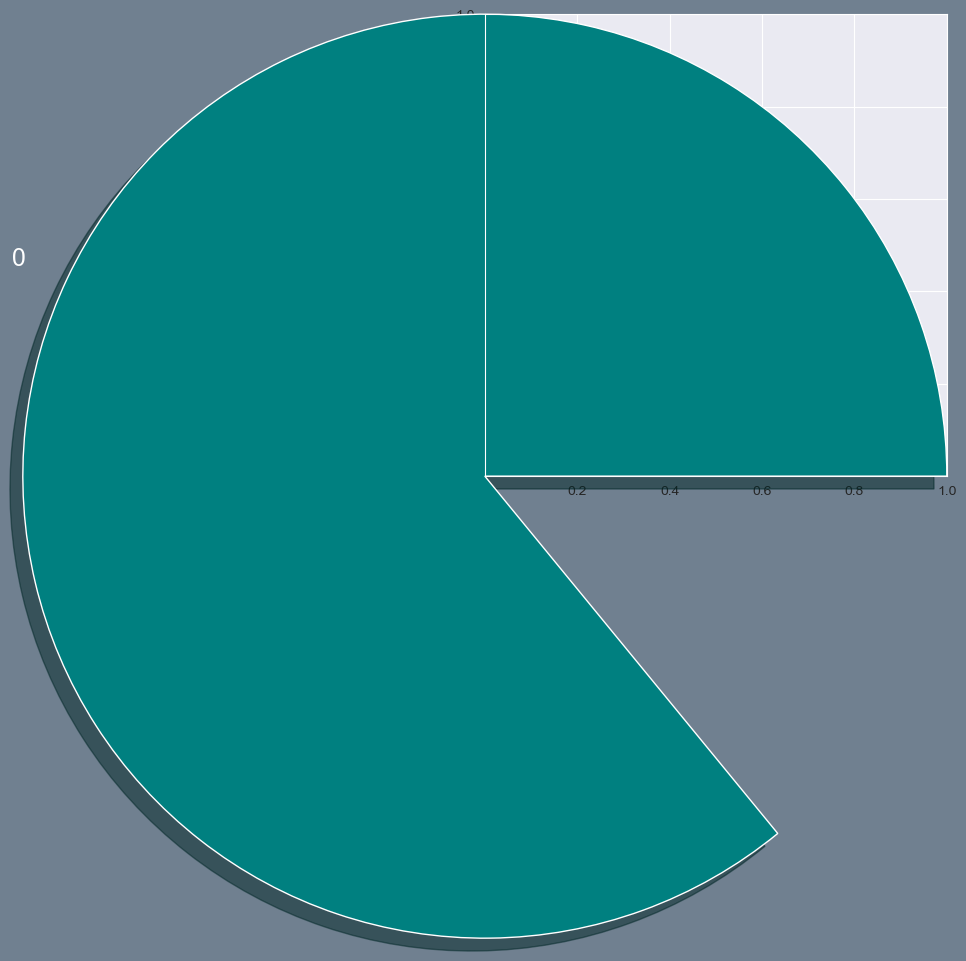

In [10]:
plt.figure(figsize=(9,6), facecolor='slategray')
churn = telcom_data_df['churn'].value_counts()
colors = ['teal', 'indianred']
sns.set_style('darkgrid')
plt.pie(churn, labels=churn.index, autopct=lambda pct: pie_label(pct, churn), colors=colors, shadow=True, textprops=dict(color='white', fontsize=18))
plt.title("Customer Churn", color='white', loc='center', weight='bold', fontsize=20)
plt.legend(title='is churn')
plt.show()


# Initial EDA

### The overall churn rate is about ~14%.

We will now calculate some descriptive statistics and start investigating the types of customers who churn.

Let's start with using the COUNTBLANK function to check if there are any missing values in our data. Since we are working with an already-cleaned dataset, there should be no missing values. However, it’s always a good idea to check for them when working with any dataset.

In [ ]:
# Keep in mind that different industries have different average churn rates.
# We encourage you to look up articles or reports online that can help you interpret your calculated churn rate.

## Initial Data Exploration

### Instructions

1. **Copy and paste all of the numerical columns from the telco_churn sheet to a new sheet.**

2. **For each column, calculate the following using Excel functions:**
   - Number of NULL or blank values
   - The mean of the column
   - The median of the column
   - The standard deviation of the column
   - The minimum value of the column
   - The maximum value of the column

3. **Using these calculated values, create a separate table in the same sheet with the following:**
   - The column names are the names of the columns from the dataset.
   - Each row has a label corresponding to the statistic calculated in the previous step.

4. **Insert a Text Box underneath the table, and add answers to the following questions:**
   - Which columns have the most variation?
   - Which columns have the largest difference between their mean and median values?
   - What does the above indicate?

In [ ]:
age_mean, age_median, age_mode, age_std, age_var, age_min, age_max = telcom_data_df['age'].mean(), telcom_data_df['age'].median(), telcom_data_df['age'].mode(), telcom_data_df['age'].std(), telcom_data_df['age'].var(), telcom_data_df['age'].min(), telcom_data_df['age'].max()
voice_mail_plan_mean, voice_mail_plan_median, total_day_minutes_median, total_day_calls_median, number_customer_service_calls_median, churn_median = telcom_data_df['voice_mail_plan'].mean(), telcom_data_df['voice_mail_plan'].median(), telcom_data_df['total_day_minutes'].mode(), telcom_data_df['total_day_calls'].std(), telcom_data_df['number_customer_service_calls'].var(), telcom_data_df['churn'].min()
number_vmail_messages_mean, number_vmail_messages_median, total_day_minutes_mode, total_day_calls_std, number_customer_service_calls_var, churn_min = telcom_data_df['number_vmail_messages'].mean(), telcom_data_df['number_vmail_messages'].median(), telcom_data_df['total_day_minutes'].mode(), telcom_data_df['total_day_calls'].std(), telcom_data_df['number_customer_service_calls'].var(), telcom_data_df['churn'].min()
number_customer_service_calls_mean, number_customer_service_calls_median, number_customer_service_calls_mode, number_customer_service_calls_std, number_customer_service_calls_var, number_customer_service_calls_min, number_customer_service_calls_max = telcom_data_df['number_customer_service_calls'].mean(), telcom_data_df['number_customer_service_calls'].median(), telcom_data_df['number_customer_service_calls'].mode(), telcom_data_df['number_customer_service_calls'].std(), telcom_data_df['number_customer_service_calls'].var(), telcom_data_df['number_customer_service_calls'].min(), telcom_data_df['number_customer_service_calls'].max()
total_day_minutes_mean, total_day_minutes_median, total_day_minutes_mode, total_day_minutes_std, total_day_minutes_var, total_day_minutes_min, total_day_minutes_max = telcom_data_df['total_day_minutes'].mean(), telcom_data_df['total_day_minutes'].median(), telcom_data_df['total_day_minutes'].mode(), telcom_data_df['total_day_minutes'].std(), telcom_data_df['total_day_minutes'].var(), telcom_data_df['total_day_minutes'].min(), telcom_data_df['total_day_minutes'].max()
total_day_calls_mean, total_day_calls_median, total_day_calls_mode, total_day_calls_std, total_day_calls_var, total_day_calls_min, total_day_calls_max = telcom_data_df['total_day_calls'].mean(), telcom_data_df['total_day_calls'].median(), telcom_data_df['total_day_calls'].mode(), telcom_data_df['total_day_calls'].std(), telcom_data_df['total_day_calls'].var(), telcom_data_df['total_day_calls'].min(), telcom_data_df['total_day_calls'].max()
total_day_charge_mean, total_day_charge_median, total_day_charge_mode, total_day_charge_std, total_day_charge_var, total_day_charge_min, total_day_charge_max = telcom_data_df['total_day_charge'].mean(), telcom_data_df['total_day_charge'].median(), telcom_data_df['total_day_charge'].mode(), telcom_data_df['total_day_charge'].std(), telcom_data_df['total_day_charge'].var(), telcom_data_df['total_day_charge'].min(), telcom_data_df['total_day_charge'].max()
churn_mean, churn_median, churn_mode, churn_std, churn_var, churn_min, churn_max = telcom_data_df['churn'].mean(), telcom_data_df['churn'].median(), telcom_data_df['churn'].mode(), telcom_data_df['churn'].std(), telcom_data_df['churn'].var(), telcom_data_df['churn'].min(), telcom_data_df['churn'].max()

print(f'Age: mean: {age_mean}, median: {age_median}, mode: {age_mode}, std: {age_std}, var: {age_var}, min: {age_min}, max: {age_max}')
print('====================================================================================================================================================================================')
print(f'Voice Mail Plan: mean: {voice_mail_plan_mean}, median: {voice_mail_plan_median}, mode: {voice_mail_plan_median}, std: {total_day_calls_std}, var: {number_customer_service_calls_var}, min: {churn_min}')
print('====================================================================================================================================================================================')
print(f'Number Vmail Messages: mean: {number_vmail_messages_mean}, median: {number_vmail_messages_median}, mode: {total_day_minutes_mode}, std: {total_day_calls_std}, var: {number_customer_service_calls_var}, min: {churn_min}')
print('====================================================================================================================================================================================')
print(f'Number Customer Service Calls: mean: {number_customer_service_calls_mean}, median: {number_customer_service_calls_median}, mode: {number_customer_service_calls_mode}, std: {number_customer_service_calls_std}, var: {number_customer_service_calls_var}, min: {number_customer_service_calls_min}, max: {number_customer_service_calls_max}')
print('====================================================================================================================================================================================')
print(f'Total Day Minutes: mean: {total_day_minutes_mean}, median: {total_day_minutes_median}, mode: {total_day_minutes_mode}, std: {total_day_minutes_std}, var: {total_day_minutes_var}, min: {total_day_minutes_min}, max: {total_day_minutes_max}')
print('====================================================================================================================================================================================')
print(f'Total Day Calls: mean: {total_day_calls_mean}, median: {total_day_calls_median}, mode: {total_day_calls_mode}, std: {total_day_calls_std}, var: {total_day_calls_var}, min: {total_day_calls_min}, max: {total_day_calls_max}')
print('====================================================================================================================================================================================')
print(f'Total Day Charge: mean: {total_day_charge_mean}, median: {total_day_charge_median}, mode: {total_day_charge_mode}, std: {total_day_charge_std}, var: {total_day_charge_var}, min: {total_day_charge_min}, max: {total_day_charge_max}')
print('====================================================================================================================================================================================')
print(f'Churn: mean: {churn_mean}, median: {churn_median}, mode: {churn_mode}, std: {churn_std}, var: {churn_var}, min: {churn_min}, max: {churn_max}')

In [12]:
telcom_data_df.describe()

,age,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,38.599294,0.261647,7.631765,180.259600,99.907294,30.644682,1.559059,0.140706
std,5.271062,0.439583,13.439882,54.012373,19.850817,9.182096,1.311434,0.347759
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,143.325000,87.000000,24.365000,1.000000,0.000000
50%,39.000000,0.000000,0.000000,180.450000,100.000000,30.680000,1.000000,0.000000
75%,42.000000,1.000000,16.000000,216.200000,113.000000,36.750000,2.000000,0.000000
max,55.000000,1.000000,52.000000,351.500000,165.000000,59.760000,9.000000,1.000000


   - Which columns have the most variation? total_day_minutes
   - Which columns have the largest difference between their mean and median values? number_vmail_messages
   - What does the above indicate?

## Exploring Data Grouped by State and Churn

### Learn

In the previous step, you discovered the following:

- `churn` and `voice_mail_plan` are qualitative variables, so their corresponding descriptive statistics aren’t particularly helpful.
- For most variables, the mean and the median are quite similar except for `number_vmail_messages`.
- Some columns, like `total_day_calls` and `total_day_minutes`, have high variance.
- When considered independently, these variables don’t help us draw any further conclusions.

Let’s look at summary statistics by different segments to see if we can gather additional insights.

### Instructions

1. **In a new sheet, create a PivotTable grouping the data.**

2. **Add `state` and then `churn` as Rows to the PivotTable Fields.**

3. **Add the following as Values to the PivotTable Fields:**
   - Average of `age`
   - Sum of `voice_mail_plan`
   - Sum of `number_vmail_messages`
   - Average of `total_day_minutes`
   - Count of `total_day_calls`
   - Sum of `number_customer_service_calls`
   - `Churn rate`

4. **If necessary, rename any column of the above PivotTable to make it easier to reference later.**

5. **Sort the above PivotTable by the “Churn rate” value in descending order.**

6. **For the five states with the highest churn rate, compare the values corresponding to customers who have churned vs. those who haven’t.**

7. **In a Text Box, briefly describe any patterns you notice between the values and the customers who churned in these five states.**
   - For example, do churned customers in these states make more calls than those who didn't churn?

8. **[Optional] Explore the above using the remaining columns.**

9. **[Optional] Explore and identify patterns by grouping the data by `area_code` and `churn`.**

In [14]:
# In an empty cell, calculate the churn rate.
# churn_rate = telcom_data_df['churn'].value_counts()[1] / telcom_data_df['churn'].count()

# # convert to percentage
# churn_rate = churn_rate * 100
# churn_rate

# churn by state
churned_by_state = telcom_data_df.groupby('state')['churn'].sum() / 598 *100
#churned_by_state = churned_by_state.sort_values(ascending=False)

churned_by_state


state
AK    0.668896
AL    2.173913
AR    1.839465
AZ    1.170569
CA    1.672241
CO    1.505017
CT    2.508361
DC    1.337793
DE    2.173913
FL    1.505017
GA    1.170569
HI    0.668896
IA    1.170569
ID    2.006689
IL    1.003344
IN    2.173913
KS    2.508361
KY    2.006689
LA    1.170569
MA    2.341137
MD    3.177258
ME    2.675585
MI    2.508361
MN    3.177258
MO    1.672241
MS    2.508361
MT    2.842809
NC    1.170569
ND    1.003344
NE    0.836120
NH    1.672241
NJ    4.347826
NM    1.672241
NV    2.842809
NY    2.675585
OH    2.006689
OK    2.675585
OR    2.508361
PA    1.337793
RI    1.003344
SC    2.341137
SD    1.839465
TN    2.006689
TX    3.177258
UT    2.006689
VA    0.836120
VT    1.672241
WA    3.010033
WI    1.170569
WV    3.177258
WY    1.672241
Name: churn, dtype: float64

In [16]:
# create a pivot table with state and churn as rows 
#    - Average of `age`
#    - Sum of `voice_mail_plan`
#    - Sum of `number_vmail_messages`
#    - Average of `total_day_minutes`
#    - Count of `total_day_calls` 
#    - Sum of `number_customer_service_calls`

# calculate the churn rate per state and add it to the dataframe
# Calculate churn rate per state
churn_rate_per_state = telcom_data_df.groupby('state')['churn'].sum() / 598 * 100

# Add this churn rate as a new column to the DataFrame
telcom_data_df['churn_rate_per_state'] = telcom_data_df['state'].map(churn_rate_per_state)


# create the pivot table
telcom_data_pivot = pd.pivot_table(telcom_data_df, 
                                   index=['state', 'churn'], 
                                   values=['age', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'number_customer_service_calls', 'churn_rate_per_state'], 
                                   aggfunc={'age': 'mean', 'voice_mail_plan': 'sum', 'number_vmail_messages': 'sum', 'total_day_minutes': 'mean', 'total_day_calls': 'count', 'number_customer_service_calls': 'sum', 'churn_rate_per_state': 'mean' })

# Reset index to work with columns
telcom_data_pivot_reset = telcom_data_pivot.reset_index()

# Sort by churn rate, then by state
telcom_data_pivot_churn_sorted = telcom_data_pivot_reset.sort_values(by=['churn_rate_per_state', 'state'], ascending=[False, True])

# Set the index back if needed
telcom_data_pivot_churn_sorted = telcom_data_pivot_churn_sorted.set_index(['state', 'churn'])
# telcom_data_pivot_churn_sorted = telcom_data_pivot.sort_values(by='churn_rate_per_state', ascending=False)


telcom_data_pivot_churn_sorted.head(10)

age  churn_rate_per_state  number_customer_service_calls  \
state churn                                                                   
NJ    0      39.228571              4.347826                             92   
      1      31.423077              4.347826                             60   
MD    0      39.731343              3.177258                             98   
      1      30.842105              3.177258                             43   
MN    0      40.359551              3.177258                            121   
      1      31.000000              3.177258                             48   
TX    0      40.177215              3.177258                            128   
      1      28.947368              3.177258                             36   
WV    0      39.700000              3.177258                            186   
      1      31.000000              3.177258                             49   

             number_vmail_messages  total_day_calls  total_day_minutes  \
state churn                                                              
NJ    0                        460               70         179.958571   
      1                        193               26         228.011538   
MD    0                        466               67         182.897015   
      1                         83               19         218.068421   
MN    0                        673               89         175.539326   
      1                         82               19         207.694737   
TX    0                        587               79         177.674684   
      1                         31               19         218.947368   
WV    0                        943              120         174.003333   
      1                         74               19         200.052632   

             voice_mail_plan  
state churn                   
NJ    0                   16  
      1                    6  
MD    0                   15  
      1                    2  
MN    0                   22  
      1                    3  
TX    0                   20  
      1                    1  
WV    0                   30  
      1                    2

For the five states with the highest churn rate, compare the values corresponding to customers who have churned vs. those who haven’t.- the people who churn tend to be younger (roughly 10 yr difference between the age mean)
- the people who churned called customer service fewer times those who didn't call customer service
- similarly those who chruned recieved less customer service VMs than those who did not churn.


### Exploring Data Grouped by `voice_mail_plan` and `churn`

### Learn

In the PivotTable you created, you might have discovered that New Jersey (NJ) contributes the most to churn with 4.35% of all churned customers. You might also have noticed upon further exploration that those who churn have the following characteristics:

- Younger than people who didn't churn
- Make fewer daily calls
- Are being charged more per day

You can see there is a pattern emerging as we explore the data, and you might find more! If you didn’t discover much so far, don’t worry! We will continue to dig deeper.

Next, we will group our data by the `voice_mail_plan` field.

### Instructions

1. **In a new sheet, create a PivotTable grouping the data.**

2. **Add `voice_mail_plan` and then `churn` as Rows to the PivotTable Fields.**

3. **Add the following as Values:**
   - Average of `age`
   - Sum of `number_vmail_messages`
   - Sum of `total_day_minutes`
   - Average of `total_day_charge`
   - `Churn rate`

4. **If necessary, rename any column of the above PivotTable to make it easier to reference later.**

5. **In a Text Box, briefly describe any patterns you notice between the values and the customers who churned.**
   - For example, you might notice a couple of 0s when you sum the `number_vmail_messages` column. Why do you think the sum would be 0?
   - Feel free to point out any other interesting patterns you notice in the PivotTable.

6. **[Optional] Explore the above using the remaining columns.**

In [18]:
# create the pivot table
telcom_data_pivot = pd.pivot_table(telcom_data_df, 
                                   index=['voice_mail_plan', 'churn'], 
                                   values=['age', 'number_vmail_messages', 'total_day_minutes', 'total_day_charge', 'churn_rate_per_state'], 
                                   aggfunc={'age': 'mean', 'number_vmail_messages': 'sum', 'total_day_minutes': 'sum', 'total_day_charge': 'mean', 'churn_rate_per_state': 'mean'})

telcom_data_pivot_churn_sorted = telcom_data_pivot.sort_values(by='voice_mail_plan', ascending=False)

telcom_data_pivot_churn_sorted.head(10)


age  churn_rate_per_state  number_vmail_messages  \
voice_mail_plan churn                                                           
1               0      40.070874              1.969348                  29864   
                1      29.560976              2.314626                   2571   
0               0      39.962624              1.997377                      0   
                1      30.170543              2.273405                      0   

                       total_day_charge  total_day_minutes  
voice_mail_plan churn                                       
1               0             30.694311           185968.4  
                1             29.883659            14414.4  
0               0             29.511293           455158.8  
                1             36.425756           110561.7

### Analyzing Frequency Distributions

### Learn

In the previous step, we discovered that 86.3% of people who churned didn't have a voicemail plan. For that segment, we can also see that they have the following characteristics:

- Younger than those who didn't churn
- Spend relatively less time on calls
- Were spending more per day compared to the ones who didn’t churn and didn’t have a voicemail plan

By now, you should have a good idea of what variables to look at to identify relevant patterns.

We can now move on to exploring these relationships via appropriate visualizations. We'll first look at the individual distributions of our numerical columns for a broader understanding of our dataset.

### Instructions

1. **Copy the following numerical columns to a new sheet:**
   - `age`
   - `number_vmail_messages`
   - `total_day_minutes`
   - `total_day_calls`
   - `total_day_charge`
   - `number_service_calls`

2. **For each column, create a histogram:**
   - Add the appropriate title, axes labels, and legend (if any) to your charts.
   - Maximize the data-ink ratio of your charts by removing any chartjunk.

3. **For each chart, add a Text Box that briefly describes the chart.**
   - For example, for `age`, you can specify the data’s distribution as well as the range within which the majority of the values lie.

4. **Compare and contrast your histograms with the mean, median, and standard deviation values that you calculated during your initial EDA.**
   - Do those values seem to match?
   - [Optional] Or do you think you need to adjust the bins of any particular histogram?
   - [Optional] In an empty cell, briefly explain any such observations you make.

In [20]:
def pie_label(pct, x):
    value = round(pct / 100.*np.sum(x))
    return '{:d}\n({:.0f}%)'.format(value, pct)

In [22]:
def save_division(numerator, denumerator):
    if numerator == 0  and denumerator == 0:
        return 0
    elif denumerator == 0:
        raise ValueError("Division by zero is not allowed") 
    else:
        return numerator/denumerator

In [24]:
def stacking_bar_label(data):
    for idx in data.index:
        start = 0
        for col in data.columns:
            y = data.loc[idx, col]
            value = data.loc[idx, col]
            total = data.loc[idx, :].sum()
            ax.text(
                x=idx,
                y=(start + y / 2) * 0.95,
                s=f'{round(100 * value / total)}%',
                fontsize=15,
                ha='right',
                color='black',
                weight='bold'
                )
            start += y

In [26]:
class extract_data():
    def __init__(self, chart, interval):
        self.chart = chart
        self.bin_edges = self.chart.patches
        self.interval = interval
        self.x_data = [(bin_edge.get_x() + bin_edge.get_width()/2) for bin_edge in self.bin_edges]
        self.y_data = [bin_edge.get_height() for bin_edge in self.bin_edges]
        self.x_interval = np.array(self.x_data[:interval])
        self.y_churn = np.array(self.y_data[:interval])
        self.y_total = np.array(self.y_data[:interval]) + np.array(self.y_data[interval:])
    
    def hist_label(self):
        for c, d, e in zip(self.x_interval, self.y_churn, self.y_total):
            self.chart.text(
                x=c
                , y=d
                , s=f'{round(100* save_division(d, e))}%'
                , fontsize=12
                , ha='left'
                , va='center'
                , color='darkred'
                , weight='bold'
            )

    def line_label(self):
        for x, y in zip(self.x_interval, self.y_total):
            self.chart.text(
                x=x
                , y=y
                , s='{:.0f}'.format(y)
                , fontsize=12
                , ha='right'
                , va='baseline'
                , color='black'
                , weight='bold'
            )

In [28]:
color_list = [
        'lightcoral'
        ,'lightseagreen'
        , 'springgreen'
        , 'deepskyblue'
        , 'gray'
        , 'violet'
        , 'brown'
        , 'lightcoral'
        , 'deeppink'
        , 'peru'
        , 'purple'
        , 'cyan'
        , 'forestgreen'
        , 'crimson'
        , 'magenta'
        ]

In [30]:
telcom_data_df['age'].hvplot(kind='hist', bins=20, title='Age Distribution')


:Histogram   [age]   (Count)

In [32]:
telcom_data_df['number_vmail_messages'].hvplot(kind='hist', bins=50, title='number vmail messages')

:Histogram   [number_vmail_messages]   (Count)

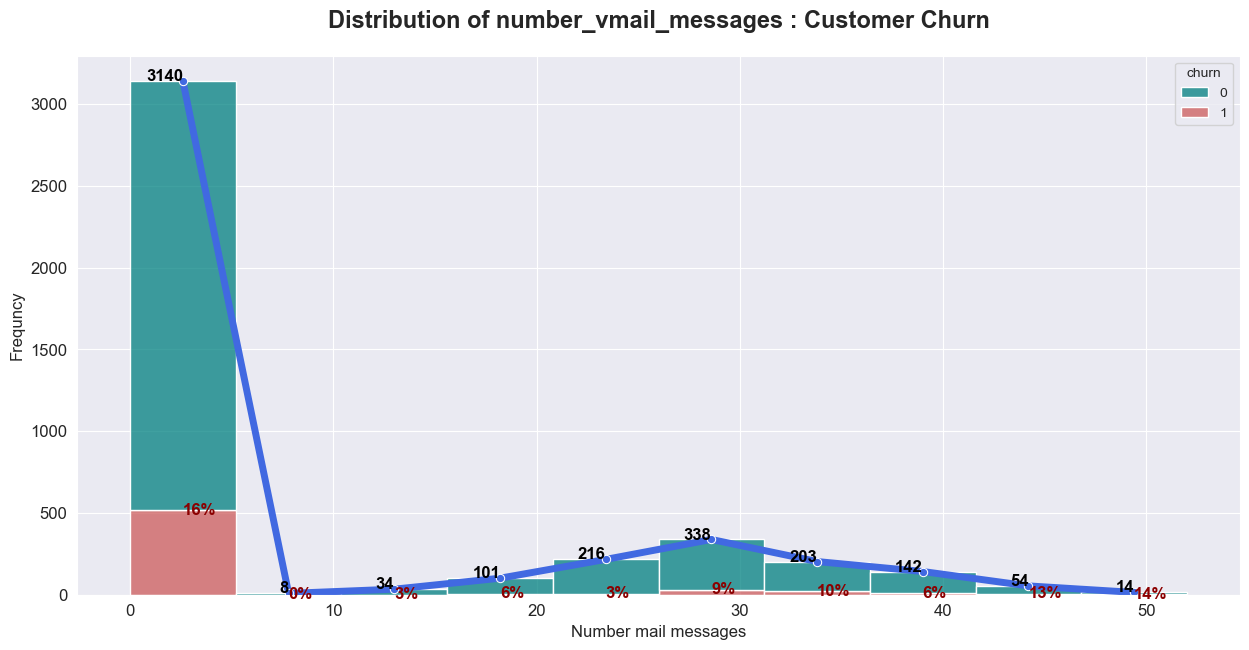

In [34]:
n = 10
target_variable = ['number_vmail_messages', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=telcom_data_df, x=target_variable[0], bins=n, stat='count', hue=target_variable[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {} : Customer Churn'.format(target_variable[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Number mail messages', fontsize=12)
ax1.set_ylabel('Frequncy', fontsize=12)
ax1.tick_params(labelsize=12)
plt.show()

In [35]:
telcom_data_df['total_day_minutes'].hvplot(kind='hist', bins=20, title='Total minutes (day)')

:Histogram   [total_day_minutes]   (Count)

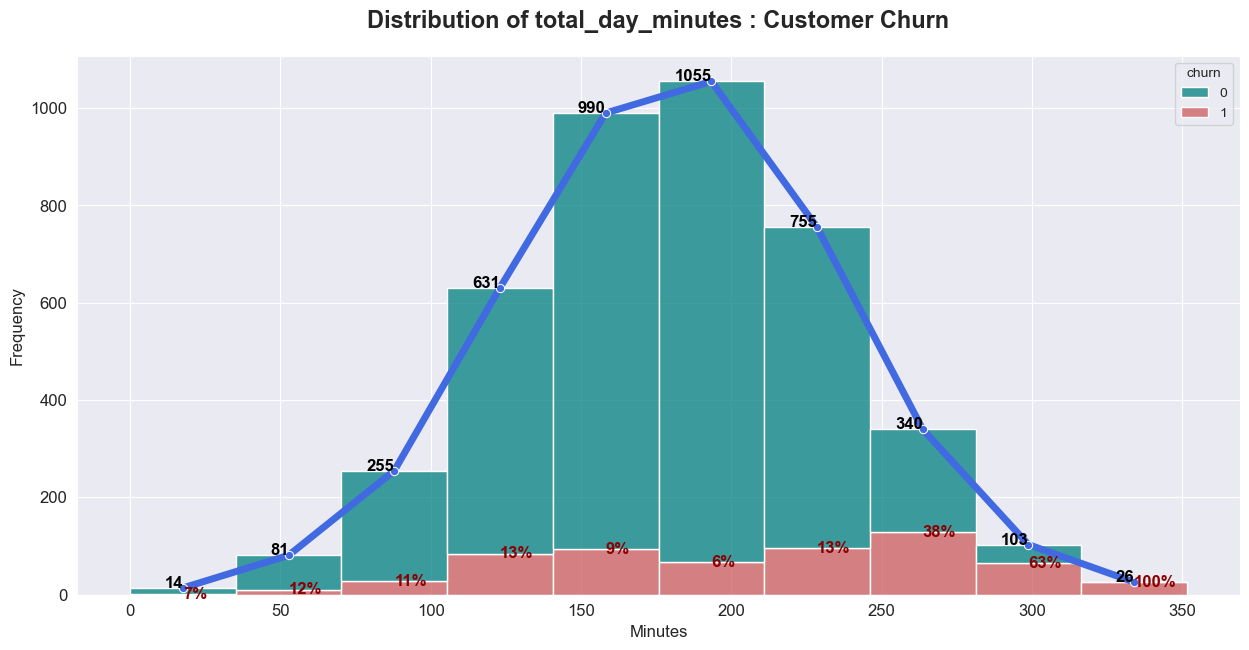

In [38]:
n = 10
target_variable = ['total_day_minutes', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=telcom_data_df, x=target_variable[0], bins=n, stat='count', hue=target_variable[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {} : Customer Churn'.format(target_variable[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Minutes', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.tick_params(labelsize=12)

plt.show()

In [40]:
telcom_data_df['total_day_calls'].hvplot(kind='hist', bins=20, title='Total Day Calls')


:Histogram   [total_day_calls]   (Count)

In [42]:
telcom_data_df['total_day_charge'].hvplot(kind='hist', bins=20, title='Total Day Charge')

:Histogram   [total_day_charge]   (Count)

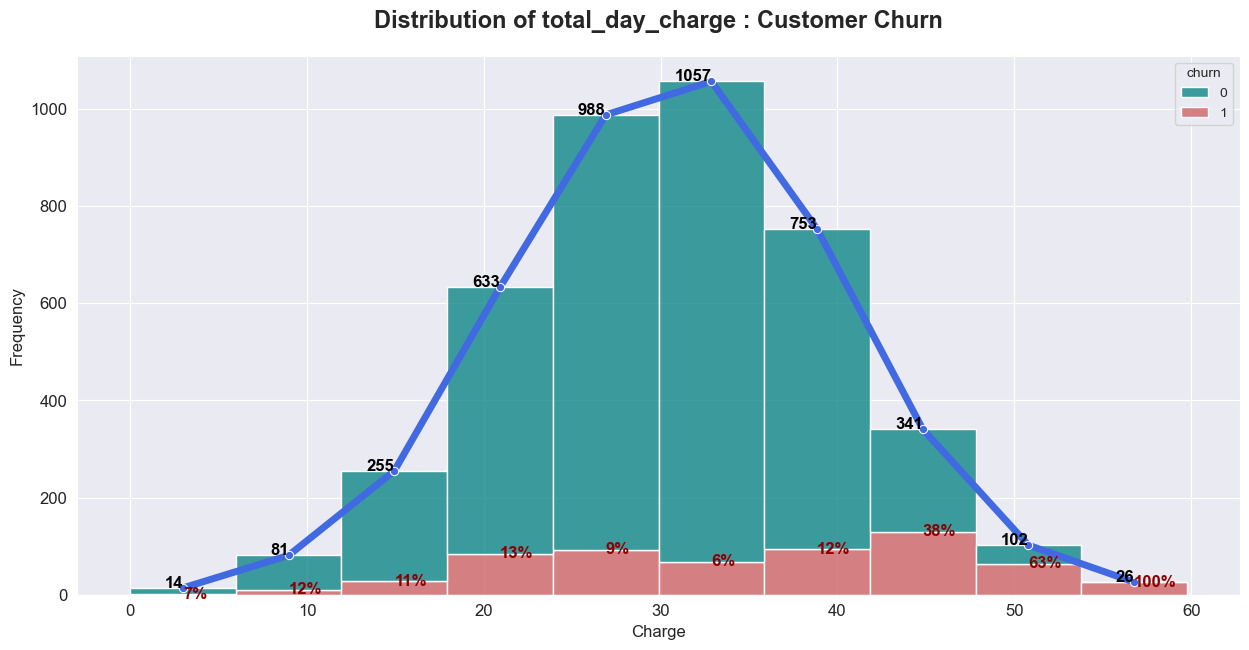

In [45]:
n = 10
target_variable = ['total_day_charge', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=telcom_data_df, x=target_variable[0], bins=n, stat='count', hue=target_variable[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {} : Customer Churn'.format(target_variable[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Charge', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.tick_params(labelsize=12)
plt.show()

In [47]:
telcom_data_df['number_customer_service_calls'].hvplot(kind='hist', bins=20, title='Number of Customer Service Calls')

:Histogram   [number_customer_service_calls]   (Count)

NameError: name 'df' is not defined

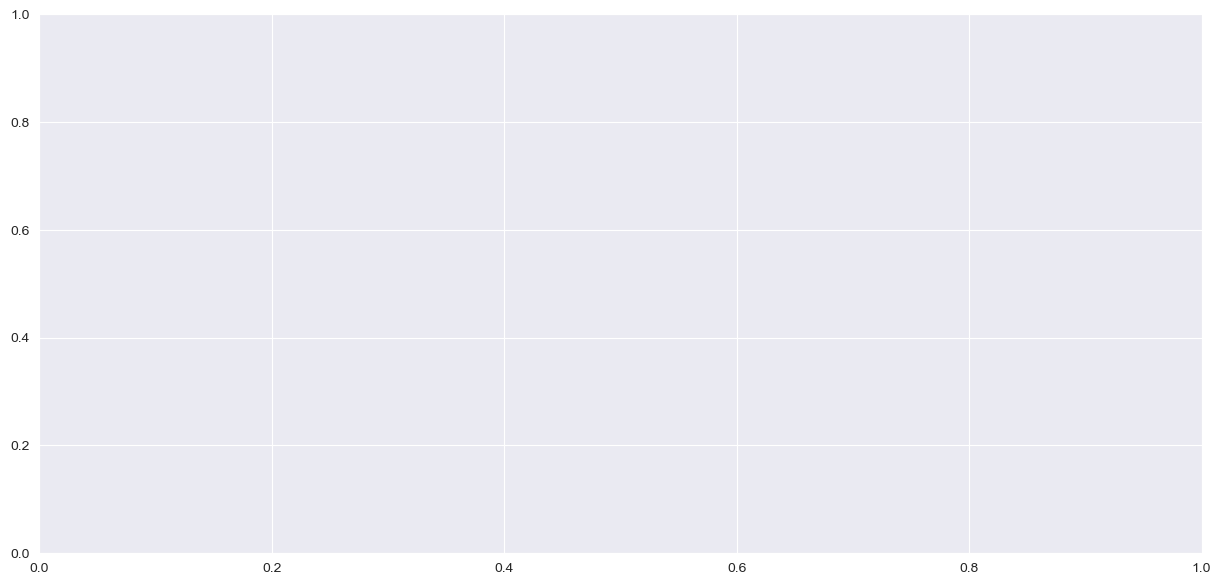

In [49]:
n = 10
target_variable = ['number_customer_service_calls', 'churn']

fig, ax1 = plt.subplots(figsize=(15,7))
sns.histplot(data=df, x=target_variable[0], bins=n, stat='count', hue=target_variable[1], multiple='stack', palette=['teal', 'indianred'], ax=ax1)
plot = extract_data(ax1, n)
plot.hist_label()
plot.line_label()
sns.lineplot(x=plot.x_interval, y=plot.y_total, marker='o', sort=False, color='royalblue', estimator=None, linewidth=5, ax=ax1)

ax1.set_title('Distribution of {} : Customer Churn'.format(target_variable[0]), fontweight='bold', pad=20, fontsize=17)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Number customer service calls', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.tick_params(labelsize=12)
plt.show()

### Visualizing Data Grouped by State and Churn

### Learn

Most of the generated histograms were normally distributed, except for a couple of them. The distributions seem to match up with the descriptive statistics that you calculated earlier.

In the first PivotTable you created, grouped by state and churn, you might have noticed the difficulty in exploring the data in tabular format. It's often easier to identify certain patterns or explore our data using appropriate visualizations.

Continuing from the previous screen, we will create additional visualizations to understand our data better.

We will limit the visualizations to the top three states out of the five we identified earlier:

- NJ
- MN
- TX

The chart might be too noisy if we use more than three states. However, we recommend you visualize the data for some of the other states as well.

### Instructions

1. **In a new sheet, create a PivotTable grouping the data.**

2. **Add `churn` as Rows, and then `state` as Columns to the PivotTable Fields.**

3. **Add the average of `age` as Values.**

4. **Filter the table to show only three states, as mentioned above.**
   - [Optional] Filter the table by some of the other states.

5. **Create a Bar Chart from the above PivotTable.**
   - Add the appropriate title, axes labels, and legend (if any) to your chart.
   - Maximize the data-ink ratio of your chart by removing any chartjunk.

6. **Add some text underneath the chart that briefly describes the chart.**

7. **Repeat the above process using the remaining variables in the data.**
   - Only use the variables/values that you identified to be relevant to churn during your initial EDA.

8. **[Optional] Repeat the above using `area_code` instead of `state`.**

In [52]:
# create the pivot table
telcom_data_pivot = pd.pivot_table(telcom_data_df, 
                                   values='age', 
                                   index='churn', 
                                   columns='state', 
                                   aggfunc='mean')

filtered_pivot_table = telcom_data_pivot[['NJ', 'MN', 'TX']]

filtered_pivot_table

state,NJ,MN,TX
churn,,,
0,39.228571,40.359551,40.177215
1,31.423077,31.000000,28.947368


In [54]:
filtered_pivot_table.hvplot(kind='hist', bins=20, title= 'Average age')

:NdOverlay   [state]
   :Histogram   [TX]   (Count)

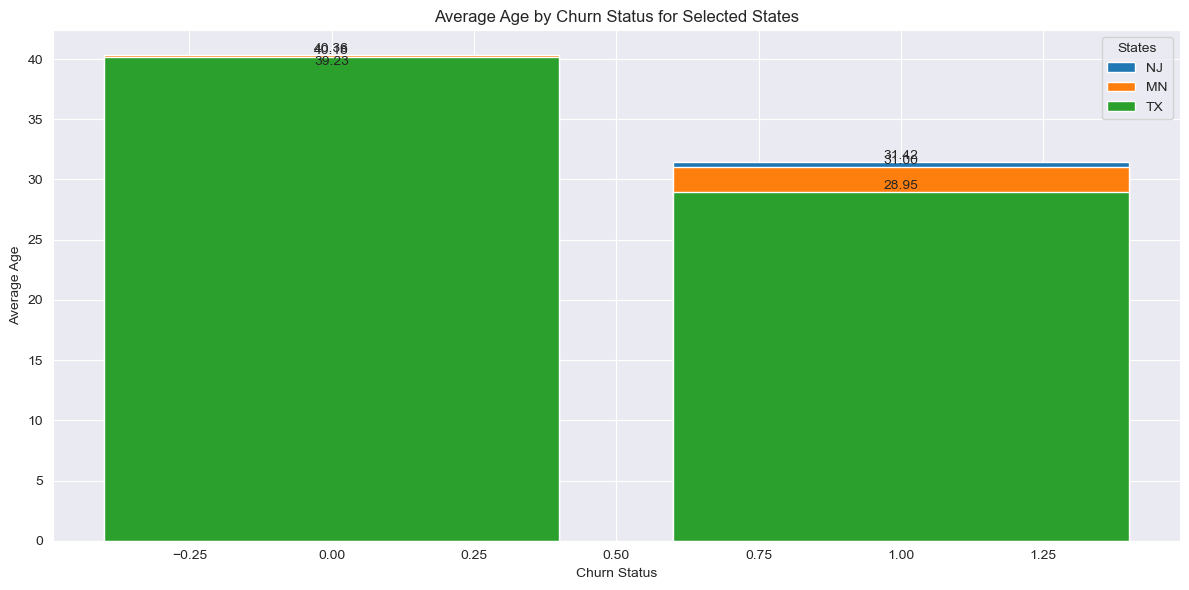

In [56]:


# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each state's data as a bar
for state in filtered_pivot_table.columns:
    ax.bar(filtered_pivot_table.index, filtered_pivot_table[state], label=state)

# Customize the chart
ax.set_xlabel('Churn Status')
ax.set_ylabel('Average Age')
ax.set_title('Average Age by Churn Status for Selected States')
ax.legend(title='States')

# Add value labels on top of each bar
for i, state in enumerate(filtered_pivot_table.columns):
    for j, value in enumerate(filtered_pivot_table[state]):
        ax.text(j, value, f'{value:.2f}', ha='center', va='bottom' if value > 0 else 'top')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

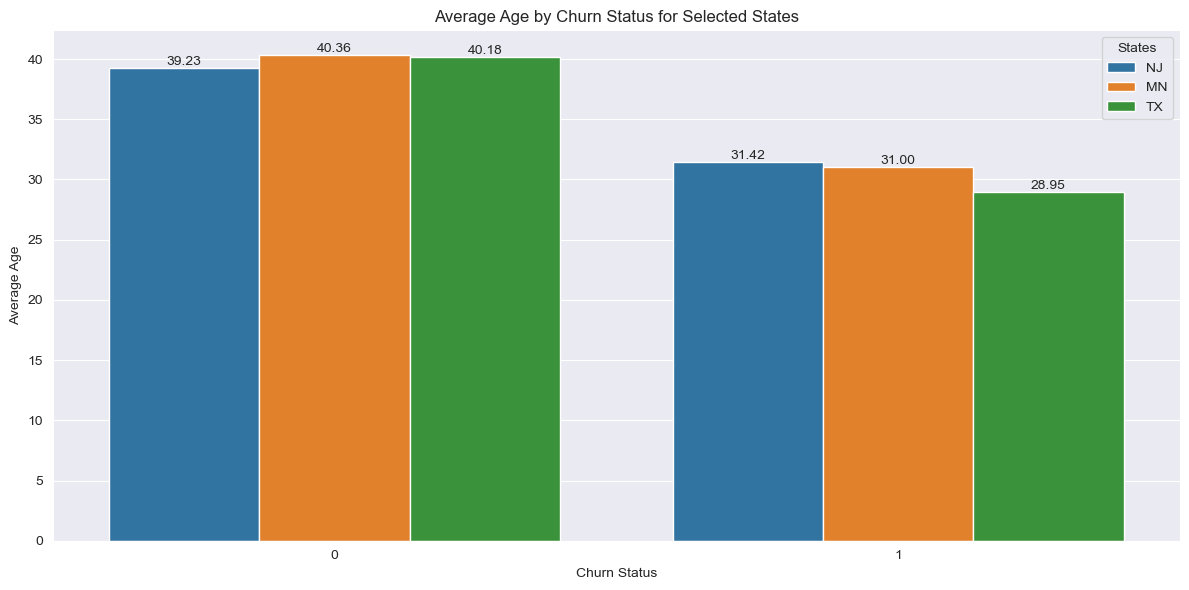

In [58]:
# Melt the pivot table to long format for easier plotting with seaborn
melted_pivot = filtered_pivot_table.reset_index().melt('churn', var_name='state', value_name='average_age')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x='churn', y='average_age', hue='state', data=melted_pivot)

# Customize the plot
plt.title('Average Age by Churn Status for Selected States')
plt.xlabel('Churn Status')
plt.ylabel('Average Age')

# Add value labels on top of each bar
for i, bar in enumerate(plt.gca().containers):
    plt.gca().bar_label(bar, fmt='%.2f', label_type='edge')

# Show legend
plt.legend(title='States')

# Display the plot
plt.tight_layout()
plt.show()

### Exploring and Visualizing Data Grouped by Churn

### Learn

Finally, we'll explore differences in the data by grouping by `churn`.

You'll also have the freedom to identify whichever values you want in your PivotTables.

### Instructions

1. **In a new sheet, create PivotTables grouping the data by `churn`.**

2. **Add and explore Values to each PivotTable that you think might be relevant.**
   - For example, you can create a PivotTable to look at the average age of customers grouped by `churn`.

3. **If necessary, rename columns of the above PivotTables to make them easier to reference later.**

4. **For each PivotTable, create a Bar Chart depicting that group’s relationship.**
   - Add the appropriate title, axes labels, and legend to your charts.
   - Add appropriate Data Labels to each chart.
   - Maximize the data-ink ratio of your charts by removing any chartjunk.

5. **Add a brief description underneath each chart that explains the relationship between the `churn` and the corresponding variable.**

6. **Do you observe any patterns that either contradict a previous discovery or weren't apparent before?**


In [65]:
pivot_age_churn = pd.pivot_table(telcom_data_df, 
                                 values=['age'], 
                                 index=['churn'], 
                                 aggfunc={'age': 'mean'})

print(pivot_age_churn)

             age
churn           
0      39.993154
1      30.086957


<Figure size 1000x600 with 0 Axes>

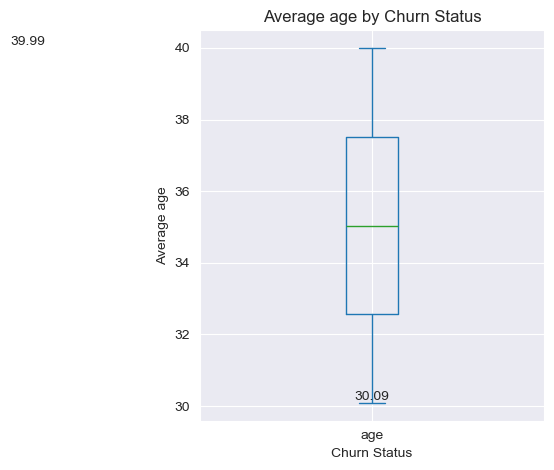

In [67]:
# Create the plot
plt.figure(figsize=(10, 6))
pivot_age_churn.plot(kind='box')

# Customize the plot
plt.title('Average age by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average age')

# Add value labels on top of each bar
for i, v in enumerate(pivot_age_churn['age']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

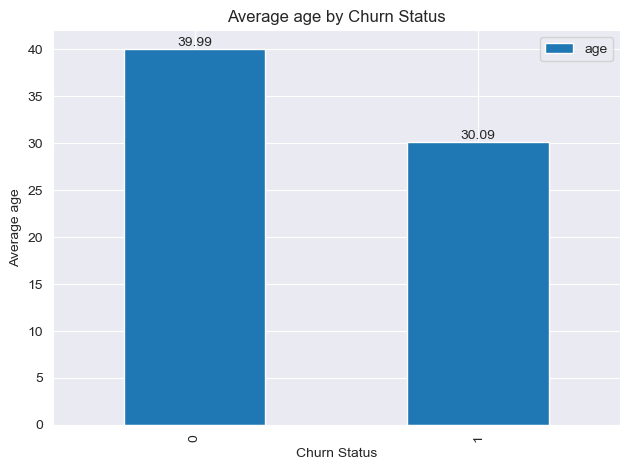

In [69]:
# Create the plot
plt.figure(figsize=(10, 6))
pivot_age_churn.plot(kind='bar')

# Customize the plot
plt.title('Average age by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average age')

# Add value labels on top of each bar
for i, v in enumerate(pivot_age_churn['age']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Display the plot
plt.tight_layout()
plt.show()

In [80]:
pivot_charge_churn = pd.pivot_table(telcom_data_df, 
                                 values=['total_day_charge'], 
                                 index=['churn'], 
                                 aggfunc={'total_day_charge': 'mean'})

print(pivot_age_churn)

             age
churn           
0      39.993154
1      30.086957


In [73]:
# Create the plot
plt.figure(figsize=(10, 6))
pivot_charge_churn.plot(kind='bar')

# Customize the plot
plt.title('Average Total Day Charge by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Total Day Charge')

# Add value labels on top of each bar
for i, v in enumerate(pivot_charge_churn['total_day_charge']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Display the plot
plt.tight_layout()
plt.show()

NameError: name 'pivot_charge_churn' is not defined

<Figure size 1000x600 with 0 Axes>

In [90]:
pivot_number_vmail_messages_churn = pd.pivot_table(telcom_data_df, 
                                 values=['number_vmail_messages'], 
                                 index=['churn'], 
                                 aggfunc={'number_vmail_messages': 'mean'})

print(pivot_number_vmail_messages_churn)

       number_vmail_messages
churn                       
0                   8.177437
1                   4.299331


In [ ]:
# Create the plot
plt.figure(figsize=(10, 6))
pivot_age_churn.plot(kind='bar')

# Customize the plot
plt.title('Average age by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average_number')

# Add value labels on top of each bar
for i, v in enumerate(pivot_age_churn['age']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Display the plot
plt.tight_layout()
plt.show()

KeyError: 'total_day_minutes'

<Figure size 1000x600 with 0 Axes>

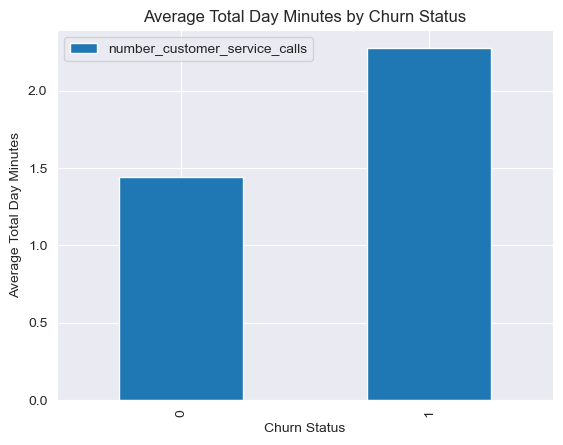

In [82]:
# Create the plot
plt.figure(figsize=(10, 6))
pivot_total_minutes_churn.plot(kind='bar')

# Customize the plot
plt.title('Average Total Day Minutes by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Average Total Day Minutes')

# Add value labels on top of each bar
for i, v in enumerate(pivot_total_minutes_churn['total_day_minutes']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v > 0 else 'top')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
pivot_total_minutes_churn = pd.pivot_table(telcom_data_df, 
                                 values=['total_day_minutes'], 
                                 index=['churn'], 
                                 aggfunc={'total_day_minutes': 'mean'})

print(pivot_total_minutes_churn)

### Final Report

### Learn

Excellent work on making it to the end of this project! You applied a variety of data exploration skills to explore and analyze a real-world dataset. There’s one final task remaining.

As an analyst, you will often communicate results to stakeholders. One of the project's goals was to create a customer profile that helps identify who would be likely to churn. Next, you will consolidate all the important and relevant insights you have discovered.

Communicating your results can often be more important than the exploration. Those results help make data-driven decisions that can positively affect both the business and customers. Plus, it adds great value to your portfolio!

### Instructions

1. **At the front of your workbook, create a new sheet, and rename it to `Report`.**

2. **Inside this sheet, do the following:**
   - Copy over two to five tables that contain information most relevant to the customer profile you have identified.
   - Underneath each table, briefly describe the table.
   - If necessary, highlight the relevant data in the table using accessible colors.
   - Copy over five to ten visualizations that you think best help explain the identified profile.
   - Make sure each chart has an associated description pointing out its relevance.

3. **[Optional] In a Text Box, add your recommendation(s) for what the telecommunication provider could focus on to decrease churn for those customers.**

   - This is to only help you better connect your EDA with business needs. It is a very valuable skill to have.


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert data to DataFrame
df = telcom_data_df
# Features (X) and target (y)
X = df[['age', 'total_day_charge']]
y = df['churn']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
# Initialize Logistic Regression model
model = LogisticRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

In [96]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 94.00%
Confusion Matrix:
[[707  14]
 [ 37  92]]


In [98]:
from sklearn.metrics import classification_report
# Generate the classification report
report = classification_report(y_test, y_pred)
# Print the classification report
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       721
           1       0.87      0.71      0.78       129

    accuracy                           0.94       850
   macro avg       0.91      0.85      0.87       850
weighted avg       0.94      0.94      0.94       850



C:\Users\lerch\AppData\Local\Temp\ipykernel_13680\2297313262.py:6: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  sc_pred = plt.scatter(X_test['age'], X_test['total_day_charge'], c=y_pred, marker='x', label='Predicted', edgecolor='r')


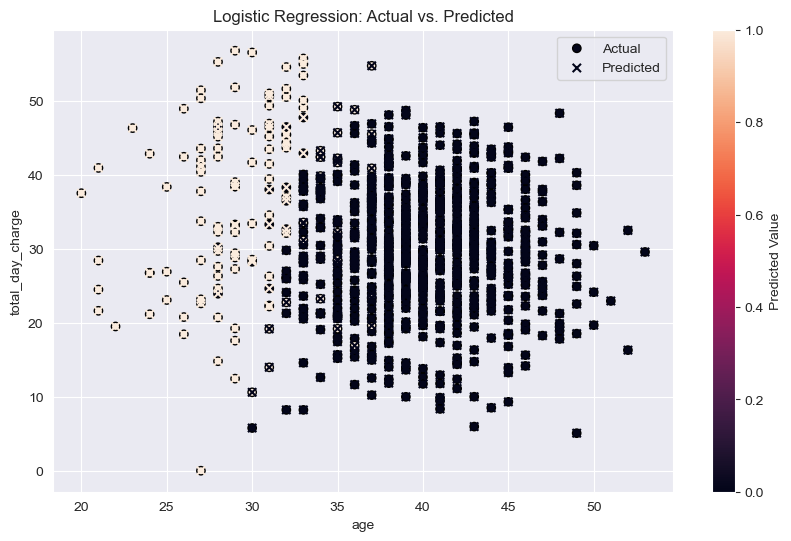

In [100]:
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
# Scatter plot for actual values
sc_actual = plt.scatter(X_test['age'], X_test['total_day_charge'], c=y_test, marker='o', label='Actual', edgecolor='k')
# Scatter plot for predicted values
sc_pred = plt.scatter(X_test['age'], X_test['total_day_charge'], c=y_pred, marker='x', label='Predicted', edgecolor='r')
# Adding the plot details
plt.title('Logistic Regression: Actual vs. Predicted')
plt.xlabel('age')
plt.ylabel('total_day_charge')
plt.legend()
plt.grid(True)
plt.colorbar(sc_pred, label='Predicted Value')
# plt.colorbar(sc_actual, label='Actual Value')
plt.show()


In [102]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
evaluation(y_test, y_pred, LR, 'LogisticRegression()')

NameError: name 'evaluation' is not defined

In [104]:
import re

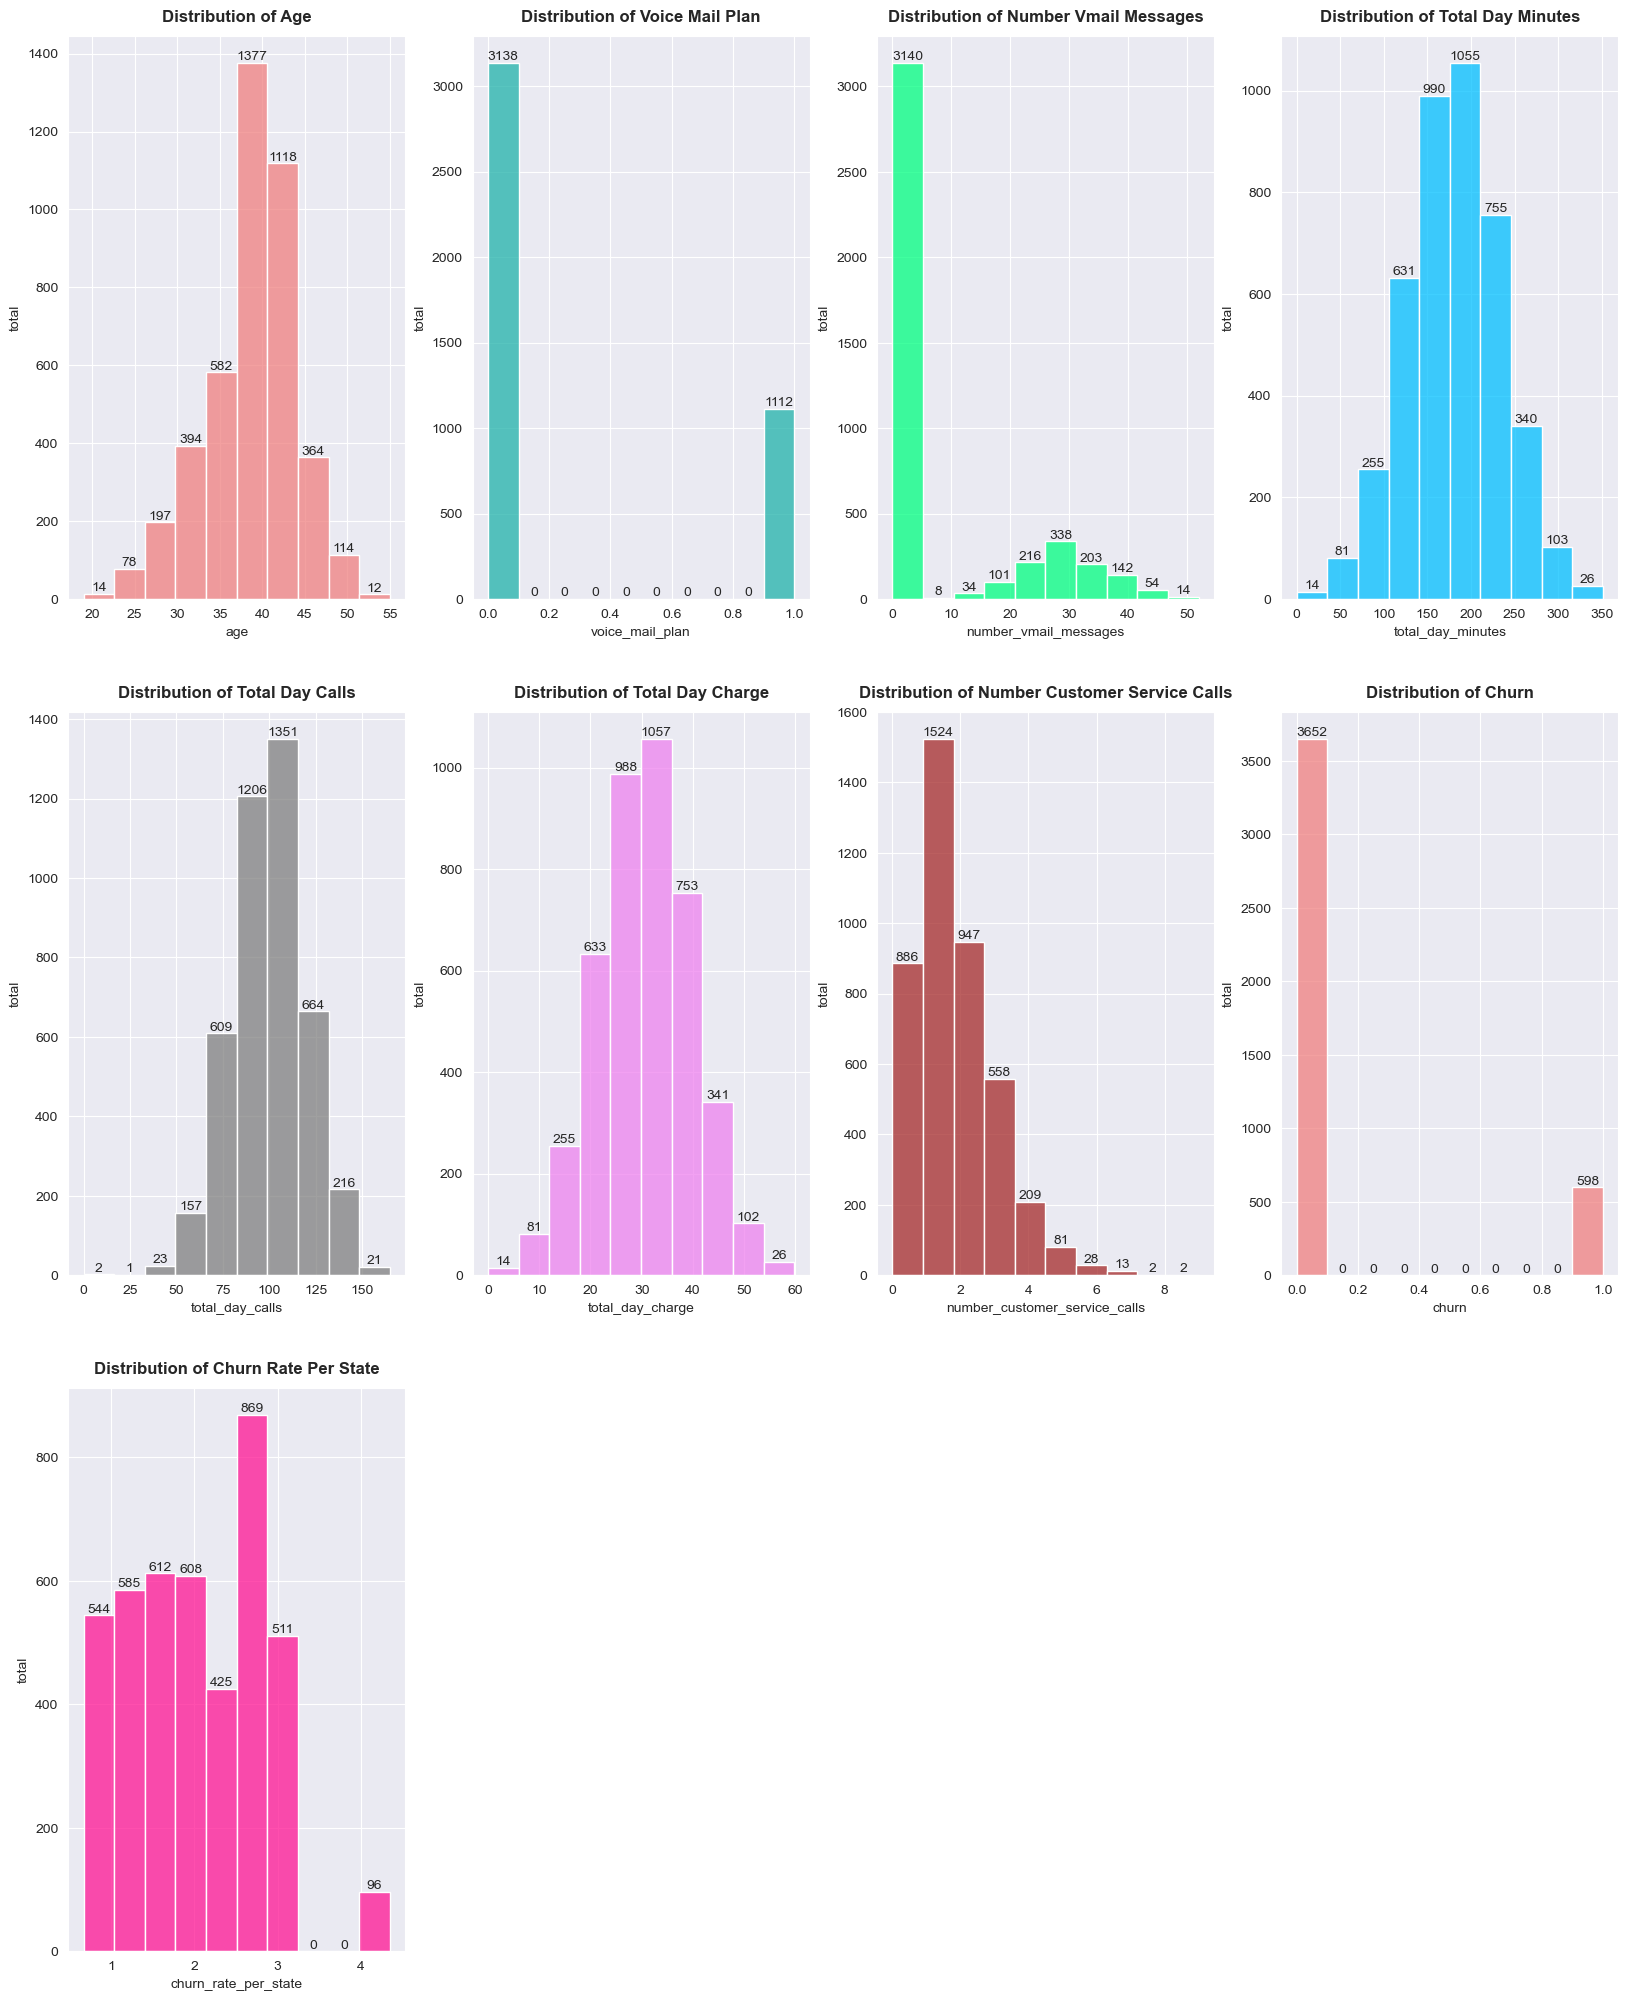

In [106]:
num_column = df.describe().columns.values
fig = plt.figure(figsize=[20,60])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7, 4, i+1)
    ax = sns.histplot(df[col], bins=10, color=color_list[i])
    ax.bar_label(ax.containers[0], fontsize=10)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('total', fontsize=10)
    ax.tick_params(labelsize=10)
    title = re.sub('_', ' ', col.title())
    ax.set_title('Distribution of {}'.format(title), fontweight='bold', fontsize=12, pad=10)

C:\Users\lerch\AppData\Local\Temp\ipykernel_13680\876837770.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(data = df, x=col, hue='churn',  palette=['teal', 'indianred'])


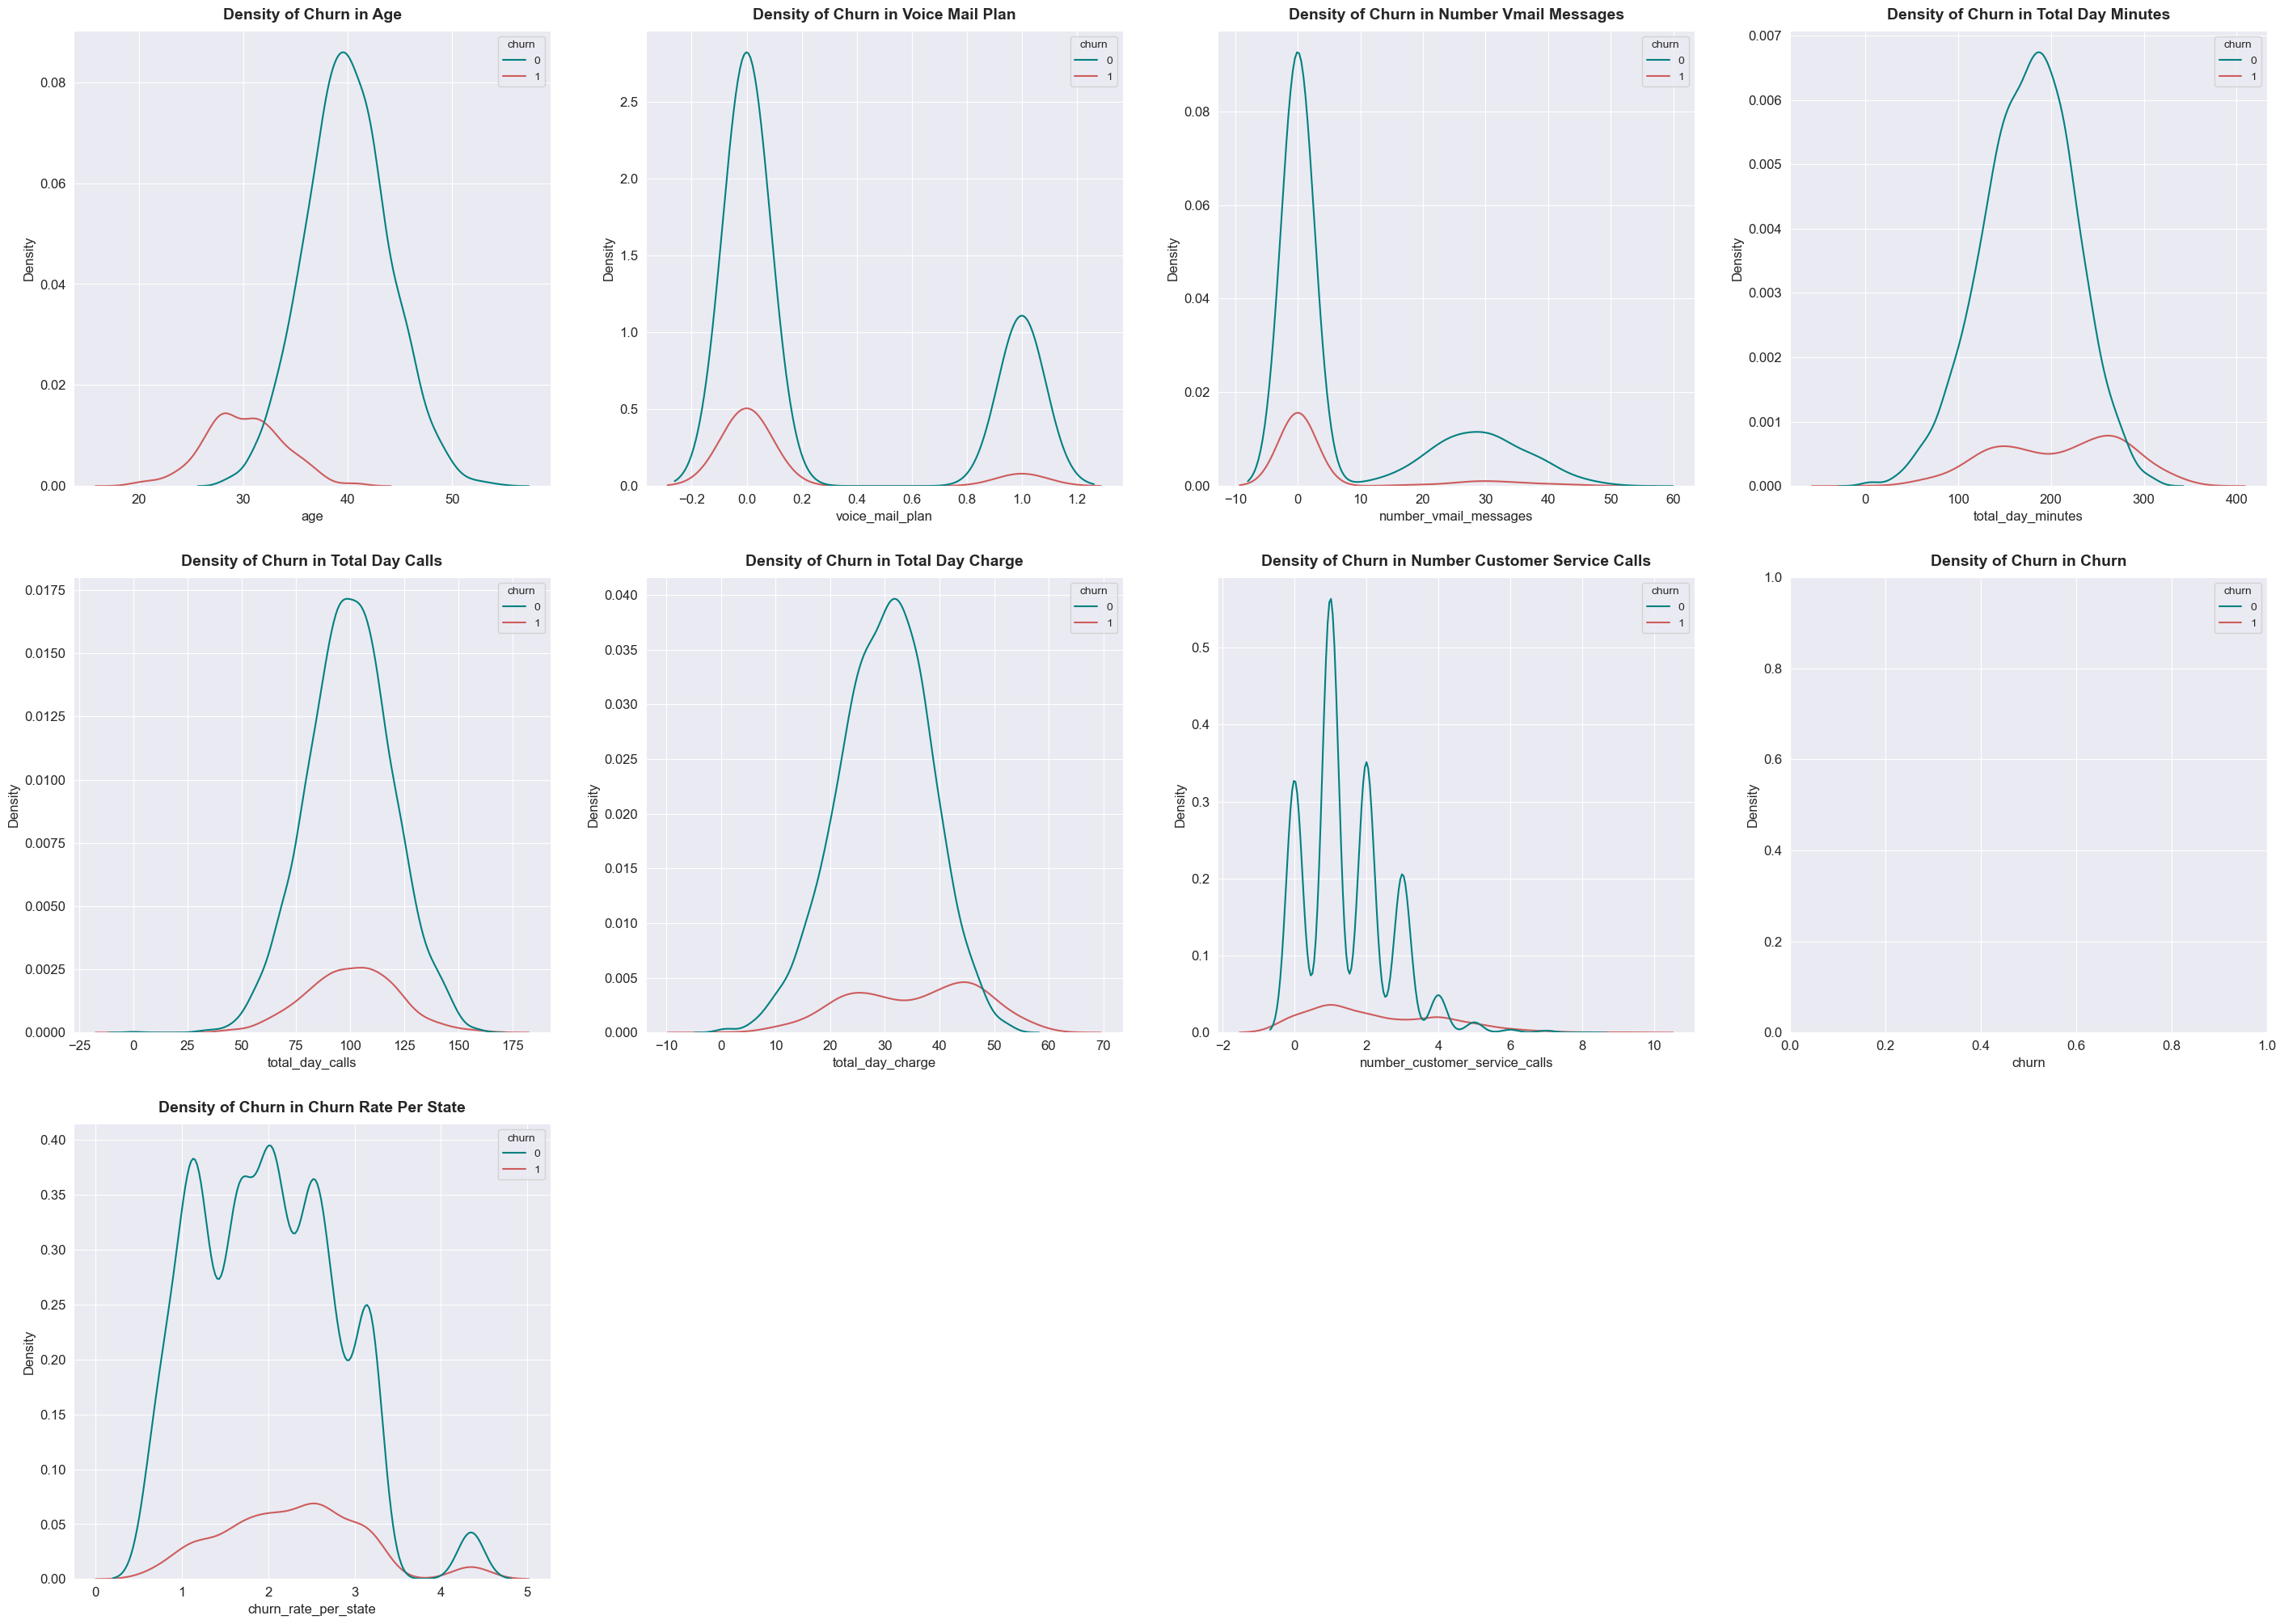

In [107]:
fig = plt.figure(figsize=[35,60])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7, 4, i+1)
    ax = sns.kdeplot(data = df, x=col, hue='churn',  palette=['teal', 'indianred'])
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Density', fontsize=12)
    ax.tick_params(labelsize=12)
    title = re.sub('_', ' ', col.title())
    ax.set_title('Density of Churn in {}'.format(title), fontweight='bold', fontsize=14, pad=10)

In [108]:
telcom_data_df.head()

,state,age,area_code,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,number_customer_service_calls,churn,churn_rate_per_state
0,OH,42,415,1,26,161.6,123,27.47,1,0,2.006689
1,NJ,36,415,0,0,243.4,114,41.38,0,0,4.347826
2,OH,39,408,0,0,299.4,71,50.90,2,0,2.006689
3,OK,41,415,0,0,166.7,113,28.34,3,0,2.675585
4,MA,34,510,1,24,218.2,88,37.09,3,0,2.341137


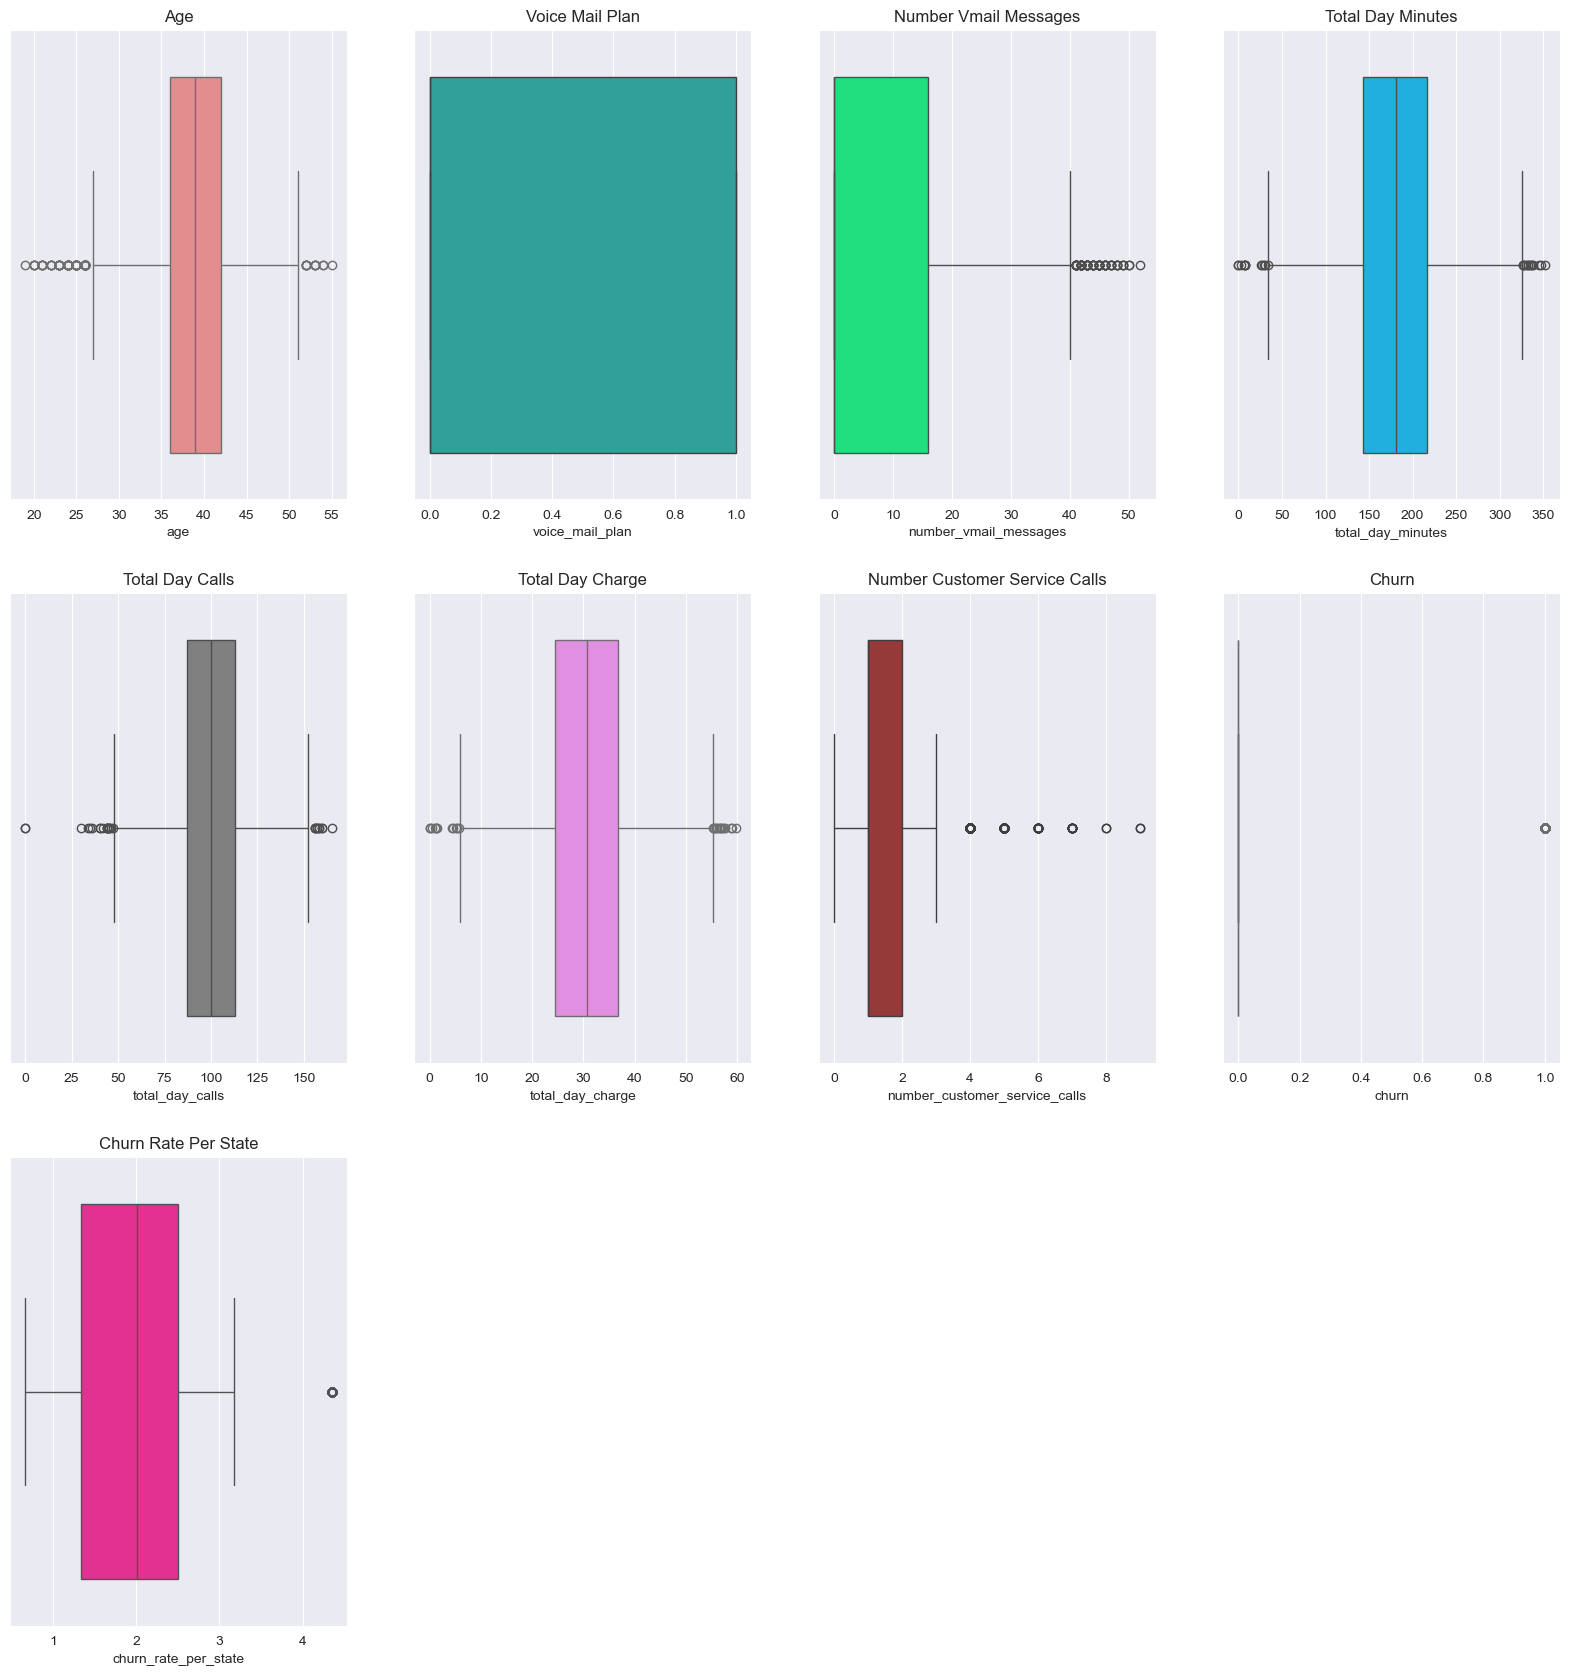

In [109]:
colour = ['lightcoral','lightseagreen', 'springgreen', 'deepskyblue', 'gray', 'violet', 'brown', 'lightcoral', 'deeppink', 'peru',
          'purple', 'cyan', 'forestgreen', 'crimson', 'magenta']
fig = plt.figure(figsize=[20,50])
for i ,col in enumerate(num_column):
    ax = fig.add_subplot(7,4, i+1)
    ax = sns.boxplot(data = df, x=col, color=color_list[i])
    title = re.sub('_', ' ', col.title())
    ax.set_title(title)
    ax.set_xlabel(col)

In [117]:
exclude_column = ['state', 'area_code', 'churn_rate_per_state']

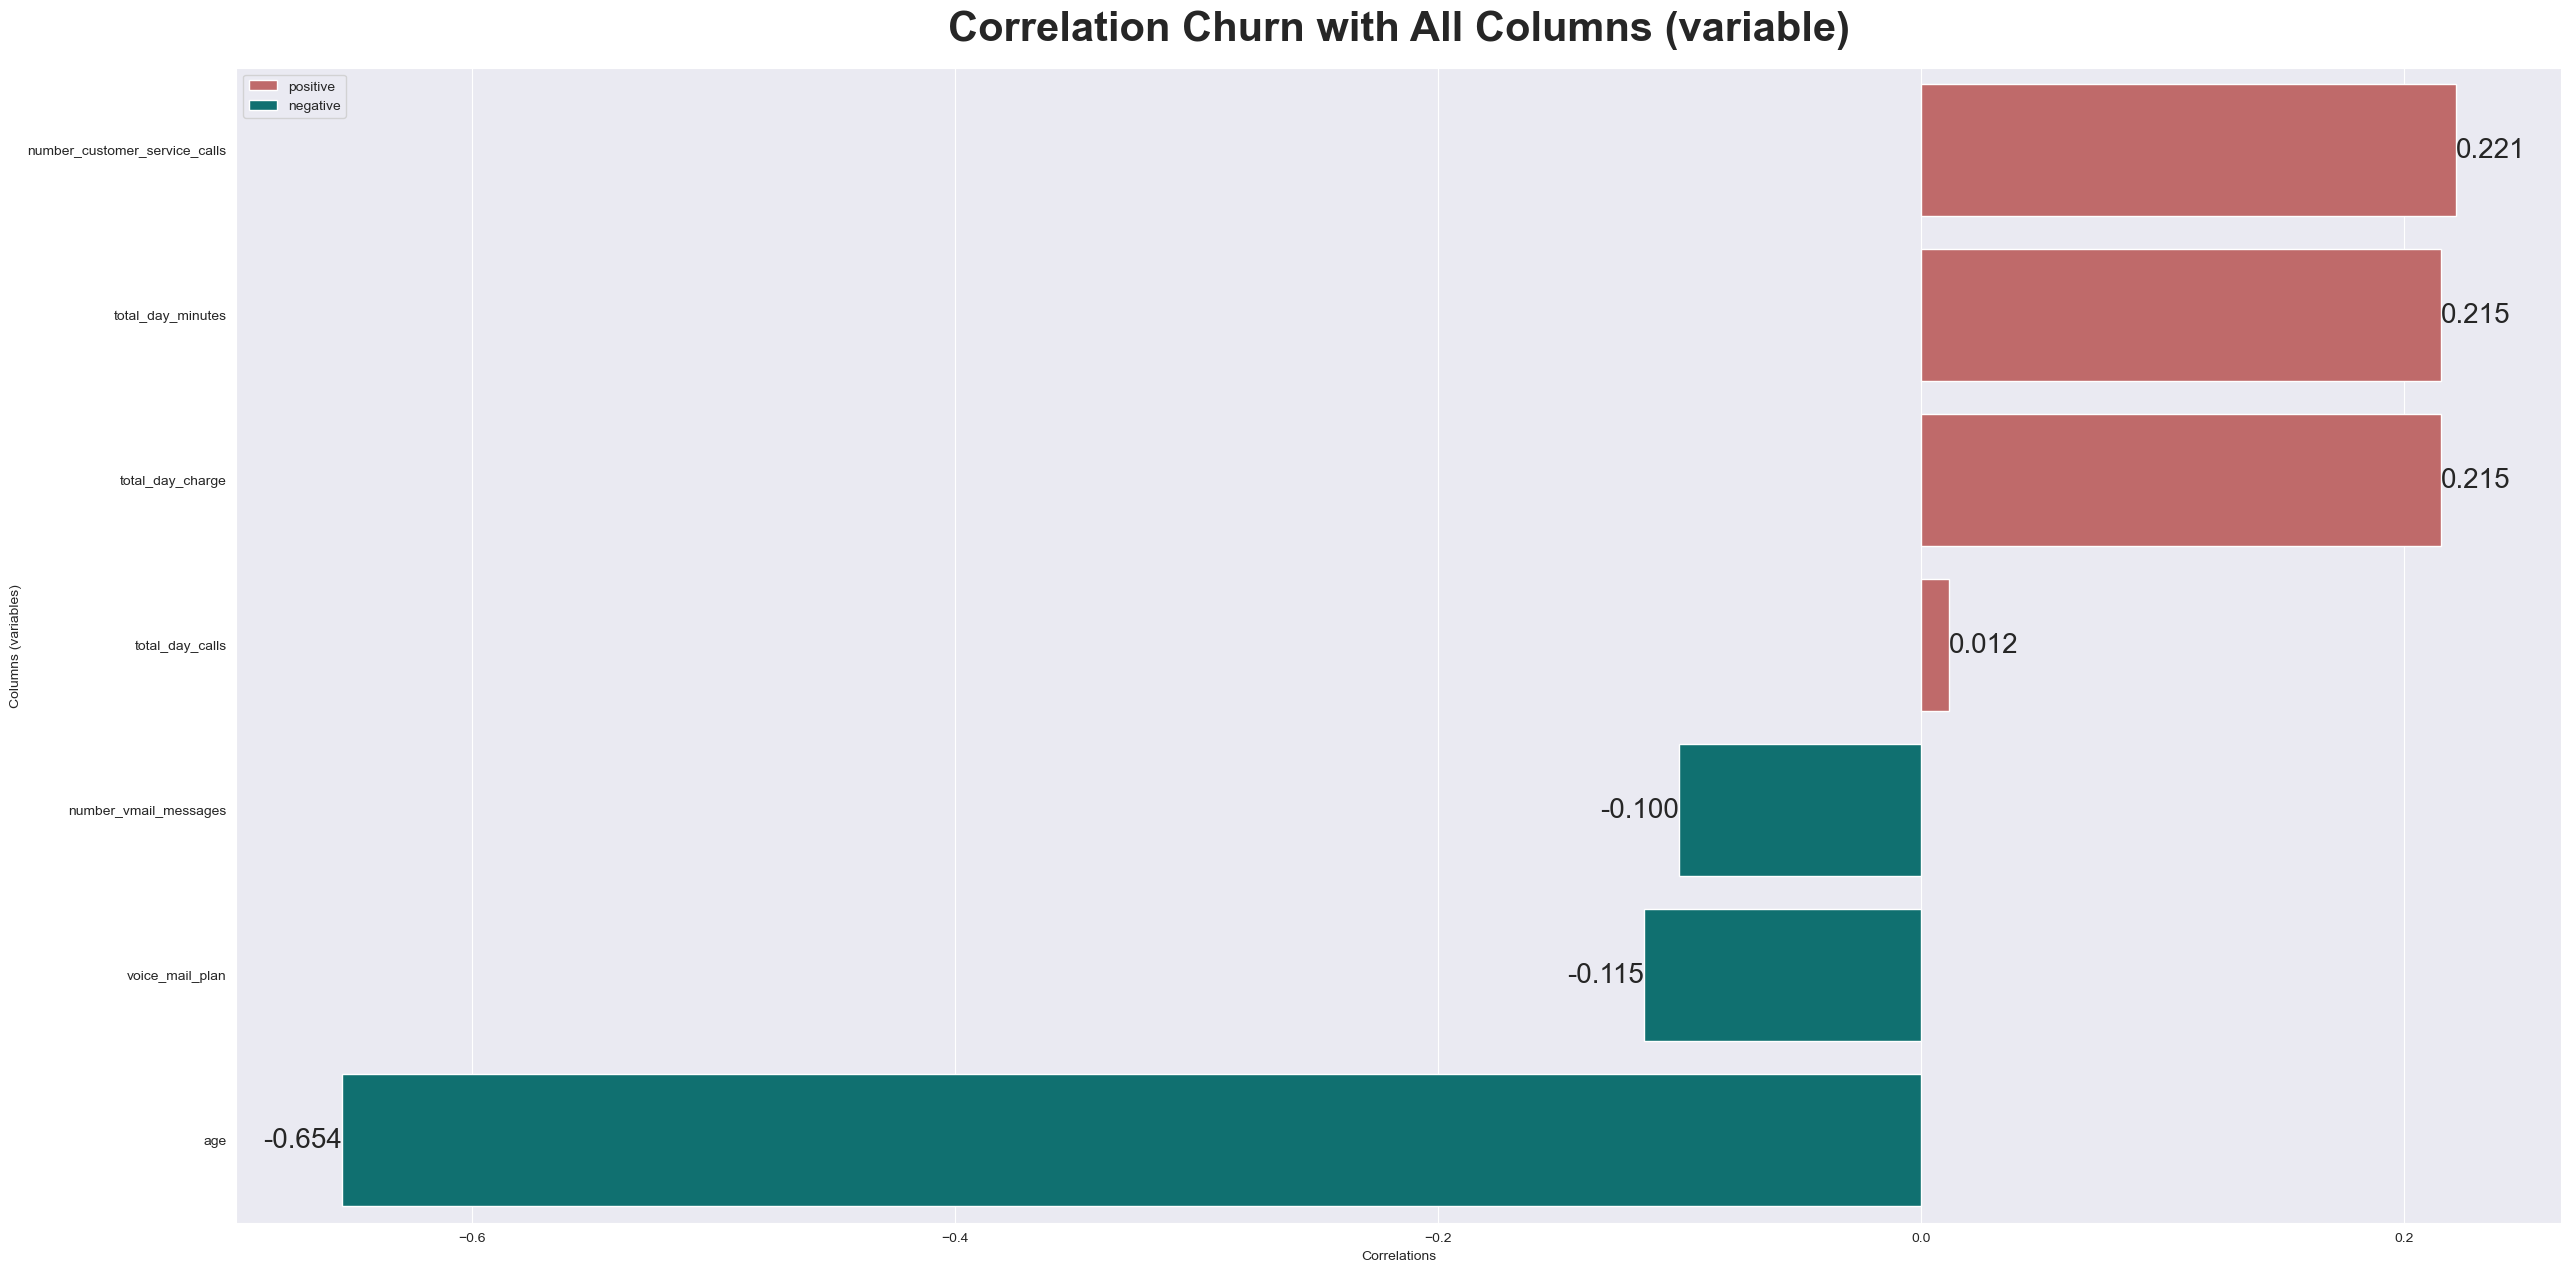

In [119]:
churn_corr = df.drop(columns=exclude_column).corr()['churn'].sort_values(ascending=False)[1:].reset_index().rename(columns={'index':'variable', 'churn':'correlation'})
churn_corr['color'] = ['positive' if value > 0 else 'negative' for value in churn_corr['correlation']]
palette = {'positive':'indianred', 'negative':'teal'}

plt.figure(figsize=(30,15))
ax = sns.barplot(data=churn_corr, y='variable', x='correlation', hue='color', palette=palette, dodge=False)
ax.bar_label(ax.containers[0], fontsize=20, fmt='%.3f')
ax.bar_label(ax.containers[1], fontsize=20, fmt='%.3f')
ax.set_xlabel('Correlations')
ax.set_ylabel('Columns (variables)')
ax.set_title('Correlation Churn with All Columns (variable)', fontweight='bold', fontsize=30, pad=20)
plt.legend()
plt.show()

Based on the results, the correlation between several columns (variables) and churn can be see

Several columns (variables) that have a unidirectional relationship (making customer churn) like : 
- total minutes
- number of customer service calls

Other columns (variables) that have an inverse relationship (making customers stay) such as:
-number of Voice mail messages
-voice mail plan
-age

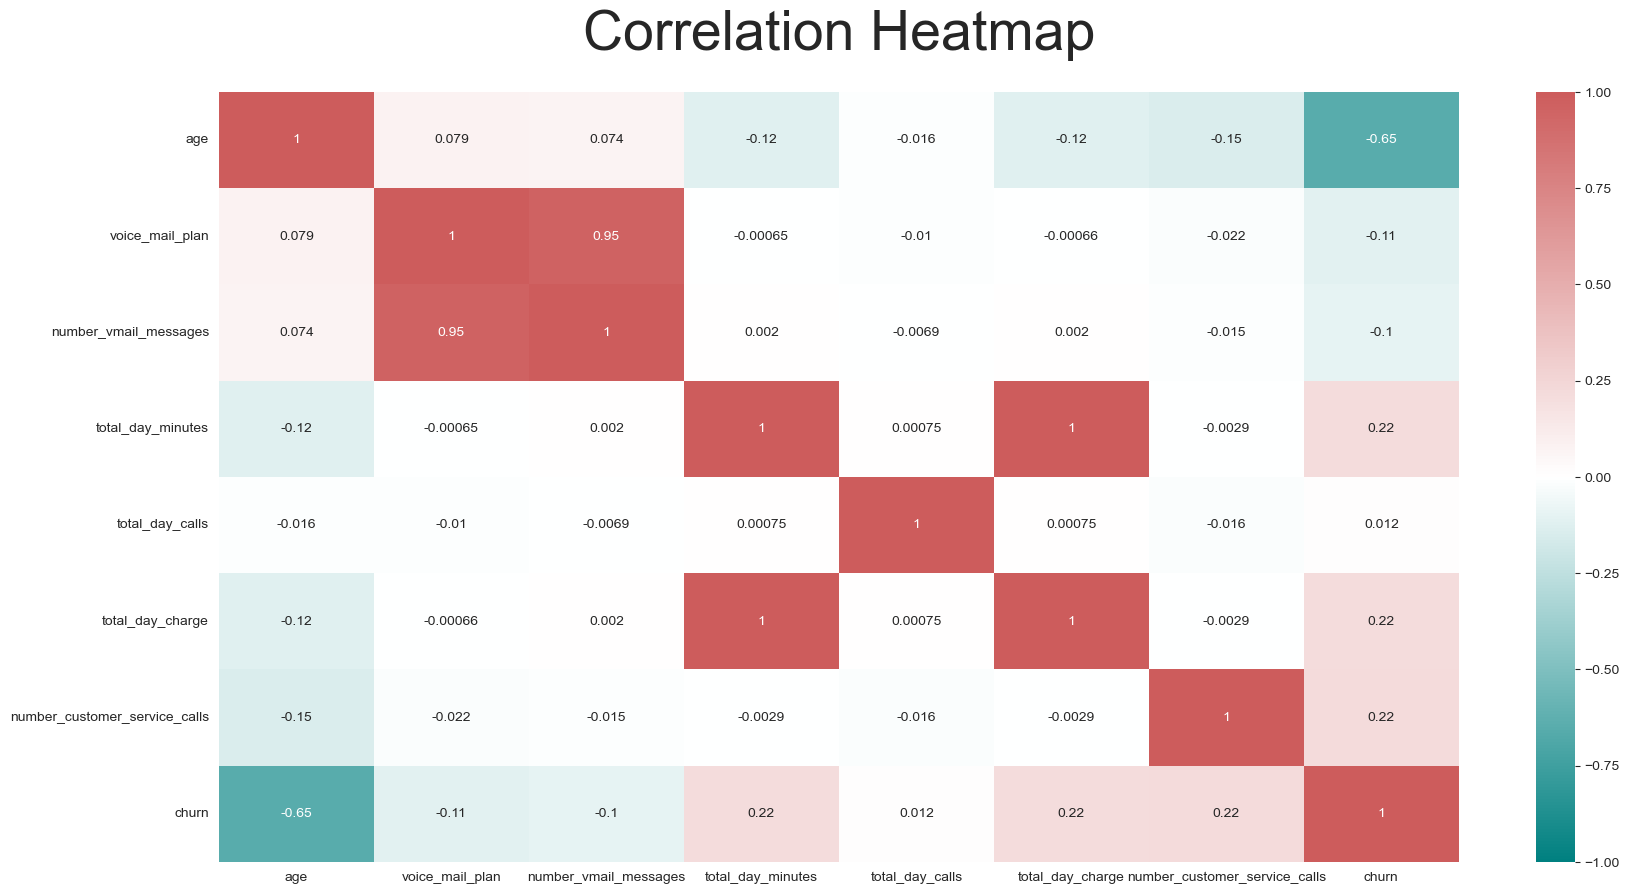

In [121]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 'teal'), (0.5, 'white'), (1, 'indianred')]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)
plt.figure(figsize=(20,10))
ax = sns.heatmap(df.drop(columns=exclude_column).corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
ax.set_title('Correlation Heatmap', fontdict={'fontsize':40}, pad=30)
plt.show()

## Summary

In this project, we applied a variety of data exploration and analysis techniques to profile customers who churned. While this project would be a great addition to your portfolio, there's more that you can do to improve your skills.

As you know, we modified the original dataset for this project. It has many more variables you could use to improve your analysis and generate better insights to identify customers who are likely to churn:

- Do customers spend more time on calls during the day or during the night? How do both relate to churn?
- Are customers who have both the voicemail and the international plan more likely to churn because they are being charged too much?
- How do the number of months the customer has been with a provider affect their likelihood to churn in relation to other variables?

Adding more data to the mix can definitely be a daunting task. Even though more data might not help improve the analysis, you can still get some good practice. So, proceed at your own pace, but definitely aim to extend your analysis even if it's with just one more variable.

If you'd like to see what kind of EDA your fellow learners carried out on this project, head over to our Community! You might discover an insight you missed. Or, your feedback could help someone else learn something new. While there, you should share your own project with everyone as well!